<div class="alert alert-block alert-success">

#  BA Carriers Ratings In CentralDispatch
    
</div>

In [1]:
import pandas as pd
import seaborn as  sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
df = pd.read_excel("Dispech.xlsx","all_ratings")

In [3]:
df_star = df.groupby("Star").agg({"Status":"count"})\
            .reset_index()\
            .rename(columns={"Status":"Quantity"})

df_star["Percentage"]  = round(df_star.Quantity / df_star.Quantity.sum(),3) * 100
df_star.append(round(df_star.sum(numeric_only= True).rename("Total")))

,Star,Quantity,Percentage
0,1STAR,7.0,2.8
1,3STAR,2.0,0.8
2,4STAR,3.0,1.2
3,5STAR,235.0,95.1
Total,NaN,247.0,100.0


In [60]:
df_star = df_star.query("Quantity > 0")

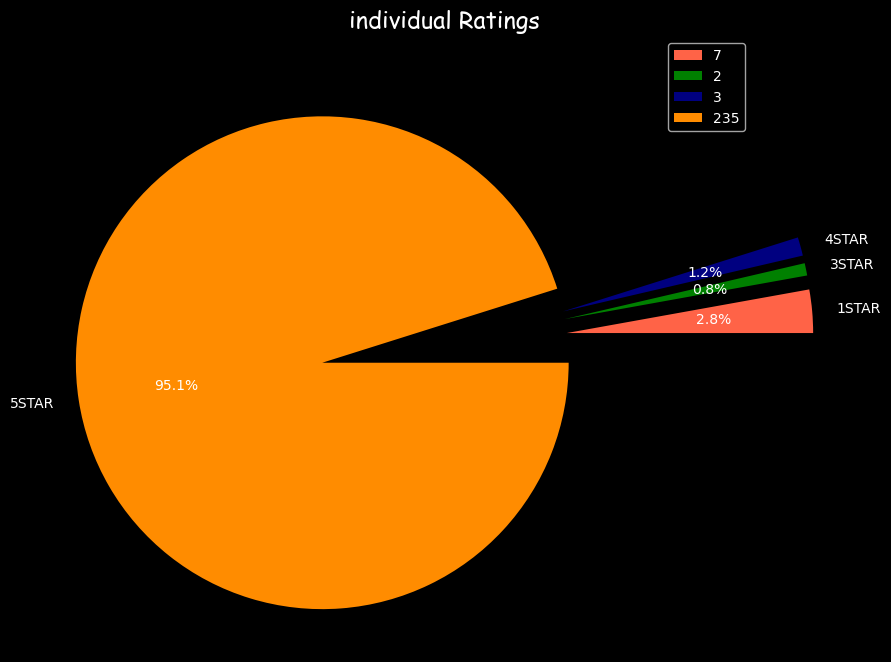

In [61]:
plt.figure(figsize=(8,8))
exp = pd.Series([0.5]*4)
color = ["tomato",'g','navy','darkorange','limegreen']
plt.pie(df_star.Quantity, labels = df_star.Star,colors = color,autopct='%1.1f%%',explode=exp)
plt.legend(df_star.Quantity)
plt.title("individual Ratings",fontdict={'fontsize': 17,'fontname' :'Comic Sans MS'});

In [62]:
df["Date"]= pd.to_datetime(df["Date"],dayfirst =True)
df['Month'] = df.Date.astype('datetime64[M]')
df['Month_n'] = df.Date.dt.month
df['Positive'] = df.Status.apply(lambda x : 1 if x == 'Positive'  else 0)
df['Negative'] = df.Status.apply(lambda x : 1 if x == 'Negative'  else 0)

In [63]:
df_status_count = df.Status.value_counts().to_frame().reset_index()

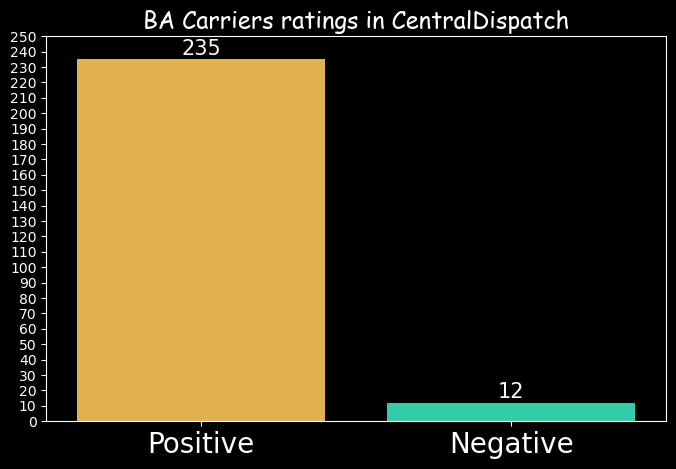

In [64]:
plt.figure(figsize=(8,5))
color = ['navy','darkred']
plots = sns.barplot(x = df_status_count["index"], y = df_status_count["Status"],palette="turbo_r")

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='top',
                   size= 15, xytext=(0, 15),color = "snow",
                   textcoords='offset points')
    
plt.tick_params(axis='x', rotation=90)
plt.title("BA Carriers ratings in CentralDispatch",fontdict={'fontsize': 17,'fontname' :'Comic Sans MS'})

plt.yticks(np.arange(0,251,10))
plt.ylabel(None)
plt.xlabel(None)
plt.xticks(rotation = 0,size = 20);

#  მიღებული რეიტინგების რაოდენობა  თვის ჭრილში


In [65]:
df_month = df.groupby("Month",as_index=False)\
        .agg({"Positive":"sum","Negative":"sum"})\
        .reset_index(drop=True)

df_month["Total"] = df_month['Positive'] + df_month['Negative']
df_month.append(df_month.sum(numeric_only= True).rename("Total"))

,Month,Positive,Negative,Total
0,2023-02-01,5.0,0.0,5.0
1,2023-03-01,38.0,0.0,38.0
2,2023-04-01,13.0,1.0,14.0
3,2023-05-01,21.0,0.0,21.0
4,2023-06-01,25.0,1.0,26.0
5,2023-07-01,46.0,6.0,52.0
6,2023-08-01,55.0,2.0,57.0
7,2023-09-01,32.0,2.0,34.0
Total,NaT,235.0,12.0,247.0


In [66]:
df_month = df_month[["Month","Positive","Negative"]]

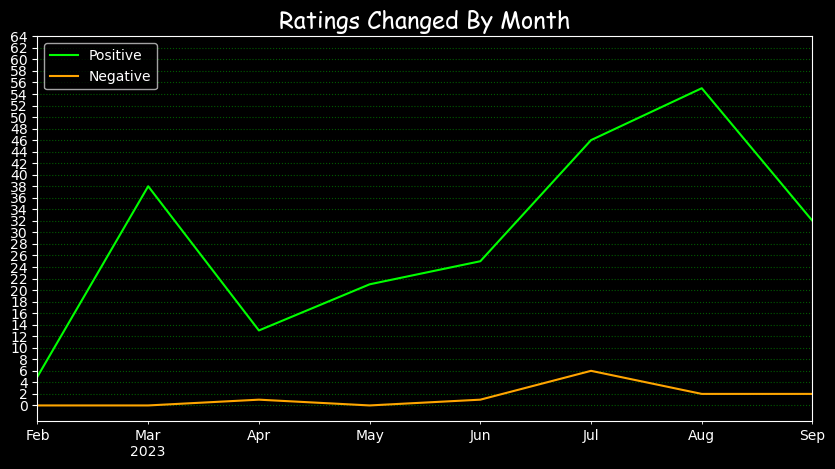

In [67]:
df_month.plot(kind = 'line',x = 'Month',color = ["lime","orange"],figsize=(10,5))
plt.title("Ratings Changed By Month",fontdict={'fontsize': 17, 'fontname':'Comic Sans MS'})
plt.grid(linestyle= ":",alpha = 0.7,color = 'g')
plt.xlabel(None)
plt.xticks(size = 15)
plt.yticks(np.arange(0,66,2));

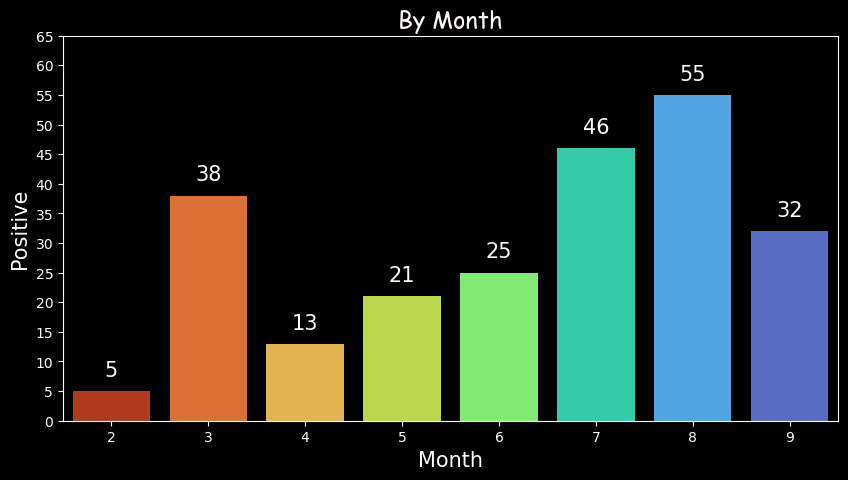

In [68]:
df_month_p = df.groupby('Month_n',as_index=False).agg({"Positive":"sum","Negative":"sum"})
plt.figure(figsize=(10,5))
plots = sns.barplot(x='Month_n', y='Positive',data = df_month_p, palette='turbo_r' )


plt.title("By Month",
          fontdict={'fontsize': 17, 'fontname' : 'Comic Sans MS', "color": "snow"}) 

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size= 15, xytext=(0, 15),color = "snow",
                   textcoords='offset points')
plt.ylabel("Positive",size = 15) 
plt.yticks(np.arange(0,66,5)) 
plt.xlabel("Month",size = 15);

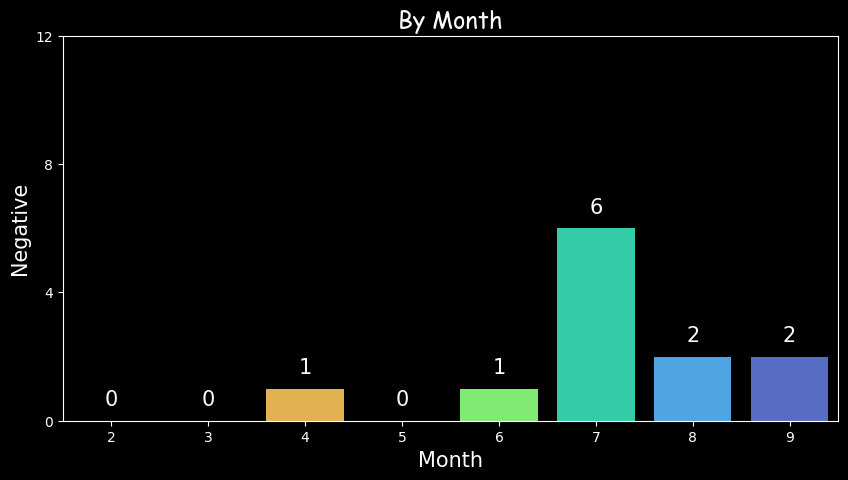

In [69]:
df_month_p = df.groupby('Month_n',as_index=False).agg({"Positive":"sum","Negative":"sum"})
plt.figure(figsize=(10,5))
plots = sns.barplot(x='Month_n', y='Negative',data = df_month_p, palette='turbo_r' )


plt.title("By Month",
          fontdict={'fontsize': 17, 'fontname' : 'Comic Sans MS', "color": "snow"}) 

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size= 15, xytext=(0, 15),color = "snow",
                   textcoords='offset points')
plt.ylabel(None)  
plt.yticks(np.arange(0,13,4)) 
plt.ylabel("Negative",size = 15) 
plt.xlabel("Month",size = 15);

# მიღებული რეიტინგების რაოდენობა კვირის ჭრილში

In [70]:
df_week = df.groupby(pd.Grouper(key="Date",freq = "W"))\
        .agg({"Positive":"sum","Negative":"sum"}).reset_index()


df_week.query('Date >= "2023-06-01"')

,Date,Positive,Negative
15,2023-06-04,9,0
16,2023-06-11,7,0
17,2023-06-18,4,0
18,2023-06-25,4,0
19,2023-07-02,7,1
20,2023-07-09,5,0
21,2023-07-16,9,2
22,2023-07-23,18,3
23,2023-07-30,11,1
24,2023-08-06,3,0


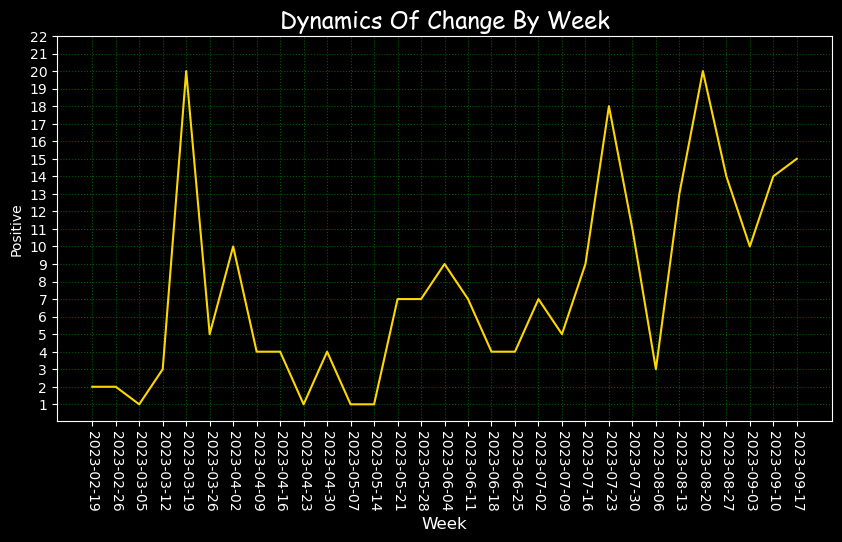

In [71]:
plt.figure(figsize=(10, 5))
sns.lineplot(x ='Date', y ='Positive',data = df_week , color = "gold")
plt.xticks(rotation = -90)
plt.xticks(df_week.Date)
plt.title("Dynamics Of Change By Week",fontdict={'fontsize': 17, 'fontname' : 'Comic Sans MS'}) 
plt.xlabel(None)
plt.grid(linestyle= ":", alpha = 0.7, color = 'g')
plt.yticks(np.arange(1,23))
plt.xlabel("Week",size = 12);

In [72]:
df_week['week_n'] = df_week.Date.dt.isocalendar().week

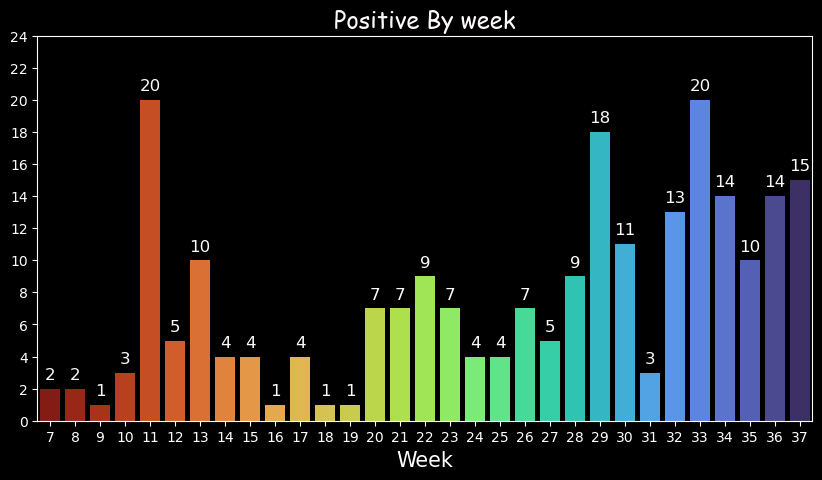

In [73]:
plt.figure(figsize=(10,5))
plots = sns.barplot(x='week_n', y='Positive',data = df_week, palette='turbo_r' )

plt.title("Positive By week",
          fontdict={'fontsize': 17, 'fontname' : 'Comic Sans MS', "color": "snow"}) 

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size= 12, xytext=(0, 10),color = "snow",
                   textcoords='offset points')
plt.ylabel(None)    
plt.yticks(np.arange(0,25,2))
plt.xlabel("Week",size = 15)
plt.show()

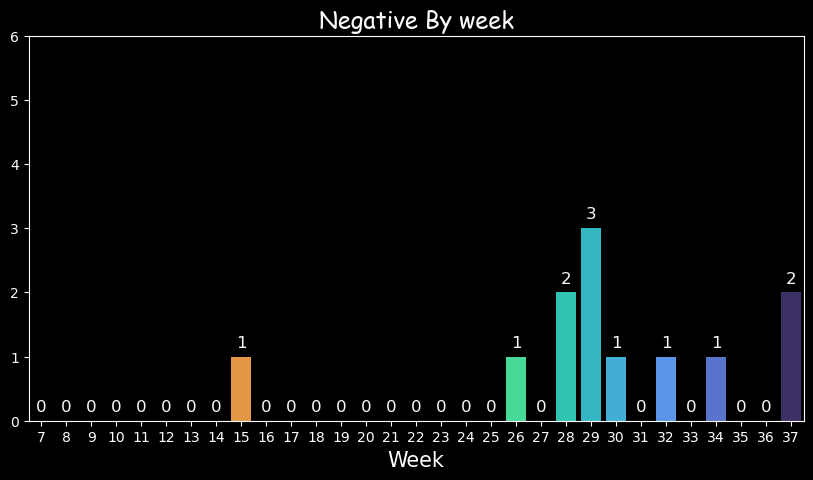

In [74]:
plt.figure(figsize=(10,5))
plots = sns.barplot(x='week_n', y='Negative',data = df_week, palette='turbo_r' )


plt.title("Negative By week",
          fontdict={'fontsize': 17, 'fontname' : 'Comic Sans MS', "color": "snow"}) 

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size= 12, xytext=(0, 10),color = "snow",
                   textcoords='offset points')
plt.ylabel(None)    
plt.yticks(np.arange(0,7))
plt.xlabel("Week",size = 15)
plt.show()

#  კომპანიების მიხედვით


In [75]:
df_company = df.groupby("Company")\
    .agg({"Positive":"sum","Negative":"sum"})\
    .sort_values("Positive",ascending=False)

df_company.head(10).T

Company,Marvel Auto Transport LLC,Infinite Routes Auto,"Mercury Auto Transport, Inc.1",MOVEAUTO,United Freeway Transportation LLC,SAFEEDS TRANSPORT INC,WhipFlip Inc,Freedom Auto Transport LLC,Xpress Auto Logistics Inc,Woodbridge Public Auto Auction
Positive,7,5,5,4,4,3,3,3,3,2
Negative,0,0,0,0,0,0,1,0,0,0


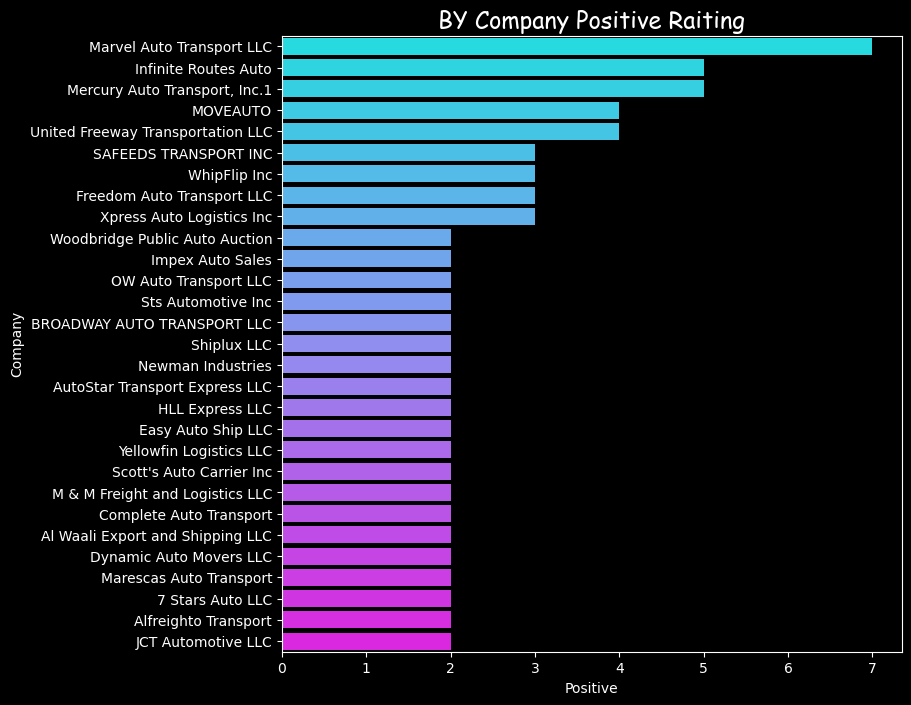

In [76]:
df_company = df_company.reset_index()
plt.figure(figsize=(8, 8))
sns.barplot(data = df_company.head(29),y = "Company", x = 'Positive', palette='cool',orient ='h')
plt.title("BY Company Positive Raiting",fontdict={'fontsize': 17, 'fontname' : 'Comic Sans MS'});

# ბოლო სამი თვეში - თვის და კვირის საშუალო მაჩვენებელი

In [77]:
Av_m = df_month.query('Month >= "2023-06-01"')["Positive"].mean()
print("საშუალოდ მიღებული პოზიტივი თვის ჭრილში :", round(Av_m,1))

საშუალოდ მიღებული პოზიტივი თვის ჭრილში : 39.5


In [78]:
Av_m = df_week.query('Date >= "2023-06-01"')["Positive"].mean()
print("საშუალოდ მიღებული პოზიტივი კვირის ჭრილში :", round(Av_m,1))

საშუალოდ მიღებული პოზიტივი კვირის ჭრილში : 10.2


In [79]:
Av_n = df_month.query('Month >= "2023-06-01"')["Negative"].mean()
print("საშუალოდ მიღებული ნეგატივი თვის ჭრილში :", round(Av_n,1))

საშუალოდ მიღებული ნეგატივი თვის ჭრილში : 2.8


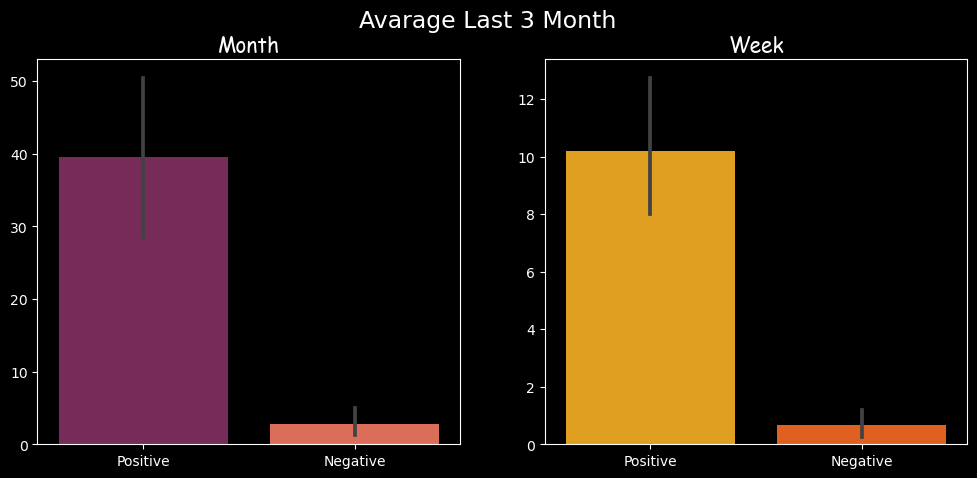

In [80]:
fig, axes = plt.subplots(1,2,figsize=(12,5))

fig.suptitle("Avarage Last 3 Month", size = 17)

sns.barplot(ax=axes[0], data = df_month.query('Month >= "2023-06-01"'), palette='rocket')
axes[0].set_title("Month",fontdict={'fontsize': 15, 'fontname' : 'Comic Sans MS'})

sns.barplot(data = df_week[["Date","Positive","Negative"]].query('Date >="2023-06-01"'),palette='autumn_r')
plt.title("Week", fontdict={'fontsize': 15, 'fontname' : 'Comic Sans MS'})

plt.show()